In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [ ]:
datos = pd.read_excel("base 5.xlsx",
                      parse_dates = True)

In [ ]:
datos

,Fecha,variacion,promedio,riesgo pais,desempleo,morosidad,PBI 2007 = 100,variacion pbi,Inflación,interes interbancario,Poblacion,pbi percapita (2007 = 100),Deficit fiscal,VIX,Reservas internacionales,Términos de Intercambio,Índice de Precios Nominales - Exportaciones,Índice de Precios Nominales - Importaciones,log prom,log riesg,log desem,log moro,log pbi,log inter,log perca,log vix,log reserv,log termin,log ind expor,log ind impor
0,2010-01-01,-3.06,4.6095,178,8.6,2.060,106.153026,-13.291791,0.30,1.048710,28692.900000,100.000000,137.000000,23.158,34342,100.024524,110.355125,110.328069,0.663654,2.250420,0.934498,0.313867,2.025932,0.020655,2.000000,1.364701,4.535826,2.000106,2.042793,2.042686
1,2010-02-01,1.47,4.6300,199,9.6,2.080,106.146323,-0.006314,0.32,1.211071,28710.633333,99.931924,331.583333,22.374,35010,99.945273,108.774607,108.834168,0.665581,2.298853,0.982271,0.318063,2.025905,0.083170,1.999704,1.349744,4.544192,1.999762,2.036528,2.036765
2,2010-03-01,3.40,4.6710,157,9.2,2.130,115.833732,9.126467,0.28,1.230323,28728.366667,108.984862,526.166667,18.244,35269,98.864768,110.690789,111.961815,0.669410,2.195900,0.963788,0.328380,2.063835,0.090019,2.037366,1.261120,4.547393,1.995042,2.044111,2.049070
3,2010-04-01,-4.09,4.6890,143,9.0,2.150,117.484525,1.425141,0.03,1.221333,28746.100000,110.469860,720.750000,19.908,35049,101.373261,114.541079,112.989439,0.671080,2.155336,0.954243,0.332438,2.069981,0.086834,2.043244,1.299028,4.544676,2.005923,2.058961,2.053038
4,2010-05-01,-6.74,4.2780,201,7.7,2.180,123.028903,4.719241,0.24,1.442581,28763.833333,115.611877,915.333333,30.872,34610,105.190809,115.958728,110.236559,0.631241,2.303196,0.886491,0.338456,2.090007,0.159140,2.063002,1.489565,4.539202,2.021978,2.064303,2.042326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2017-09-01,5.09,2.7700,144,6.4,3.490,164.440198,0.918027,-0.02,3.594333,31366.066667,141.706574,-4382.666667,10.554,64360,100.487970,117.227023,116.657768,0.442480,2.158362,0.806180,0.542825,2.216008,0.555618,2.151390,1.023417,4.808616,2.002114,2.069028,2.066914
93,2017-10-01,0.34,2.8905,139,6.2,3.440,165.157201,0.436026,-0.47,3.501613,31415.075000,142.102422,-4234.750000,10.452,63560,102.020748,119.806003,117.432979,0.460973,2.143015,0.792392,0.536558,2.217898,0.544268,2.152601,1.019199,4.803184,2.008689,2.078479,2.069790
94,2017-11-01,-1.50,2.8185,138,6.6,3.375,162.217614,-1.779872,-0.20,3.322000,31464.083333,139.355782,-4086.833333,11.084,62983,103.561099,122.780043,118.558073,0.450018,2.139879,0.819544,0.528274,2.210098,0.521400,2.144125,1.044697,4.799223,2.015197,2.089128,2.073931
95,2017-12-01,-3.29,2.7810,136,6.5,3.310,178.887888,10.276488,0.10,3.260000,31513.091667,153.437669,-3938.916667,11.350,63621,102.381007,121.966373,119.129882,0.444201,2.133539,0.812913,0.519828,2.252581,0.513218,2.185932,1.054996,4.803600,2.010219,2.086240,2.076021


In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(50)

,variable_1,variable_2,r,abs_r
492,Índice de Precios Nominales - Importaciones,log ind impor,0.999801,0.999801
828,log ind impor,Índice de Precios Nominales - Importaciones,0.999801,0.999801
432,Términos de Intercambio,log termin,0.999166,0.999166
768,log termin,Términos de Intercambio,0.999166,0.999166
677,log perca,pbi percapita (2007 = 100),0.998310,0.998310
313,pbi percapita (2007 = 100),log perca,0.998310,0.998310
798,log ind expor,Índice de Precios Nominales - Exportaciones,0.997990,0.997990
462,Índice de Precios Nominales - Exportaciones,log ind expor,0.997990,0.997990
166,PBI 2007 = 100,log pbi,0.997772,0.997772
614,log pbi,PBI 2007 = 100,0.997772,0.997772


IndexError: ignored

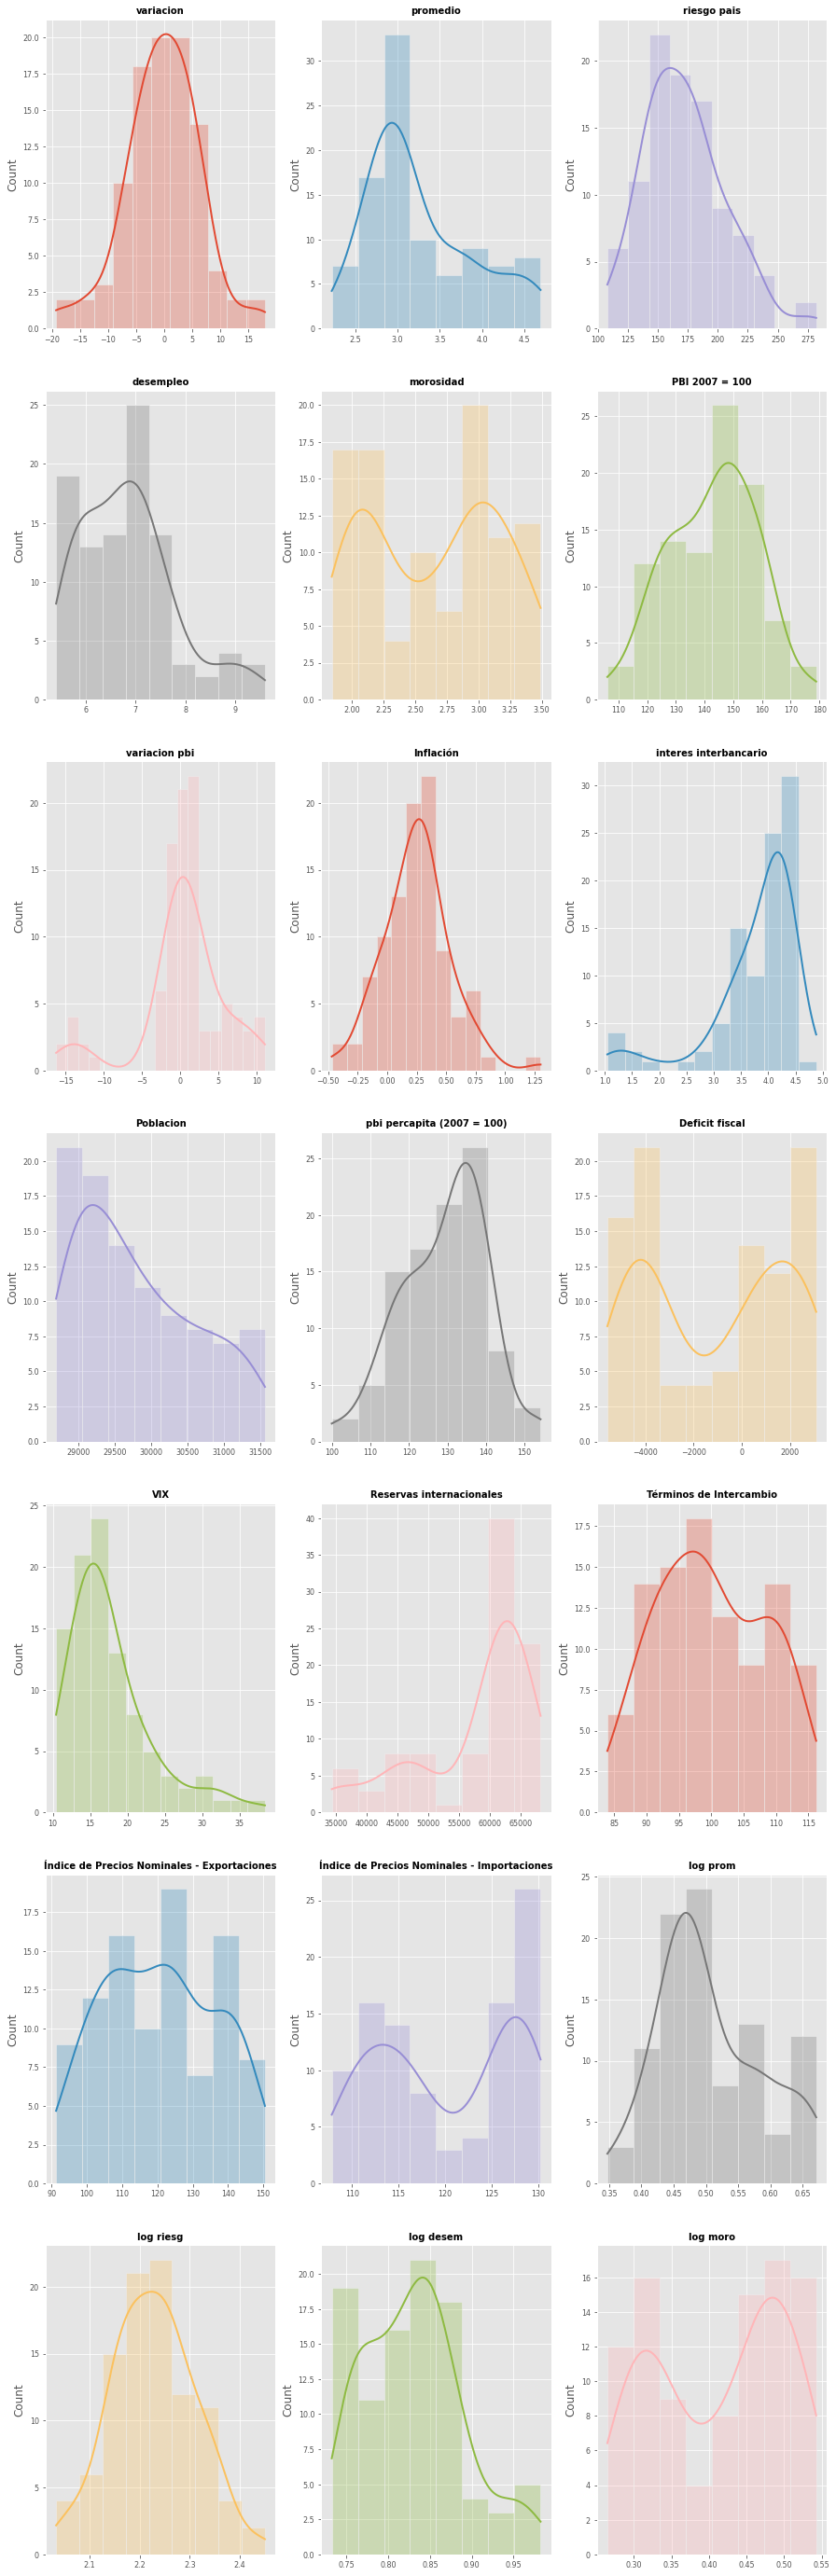

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 50))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

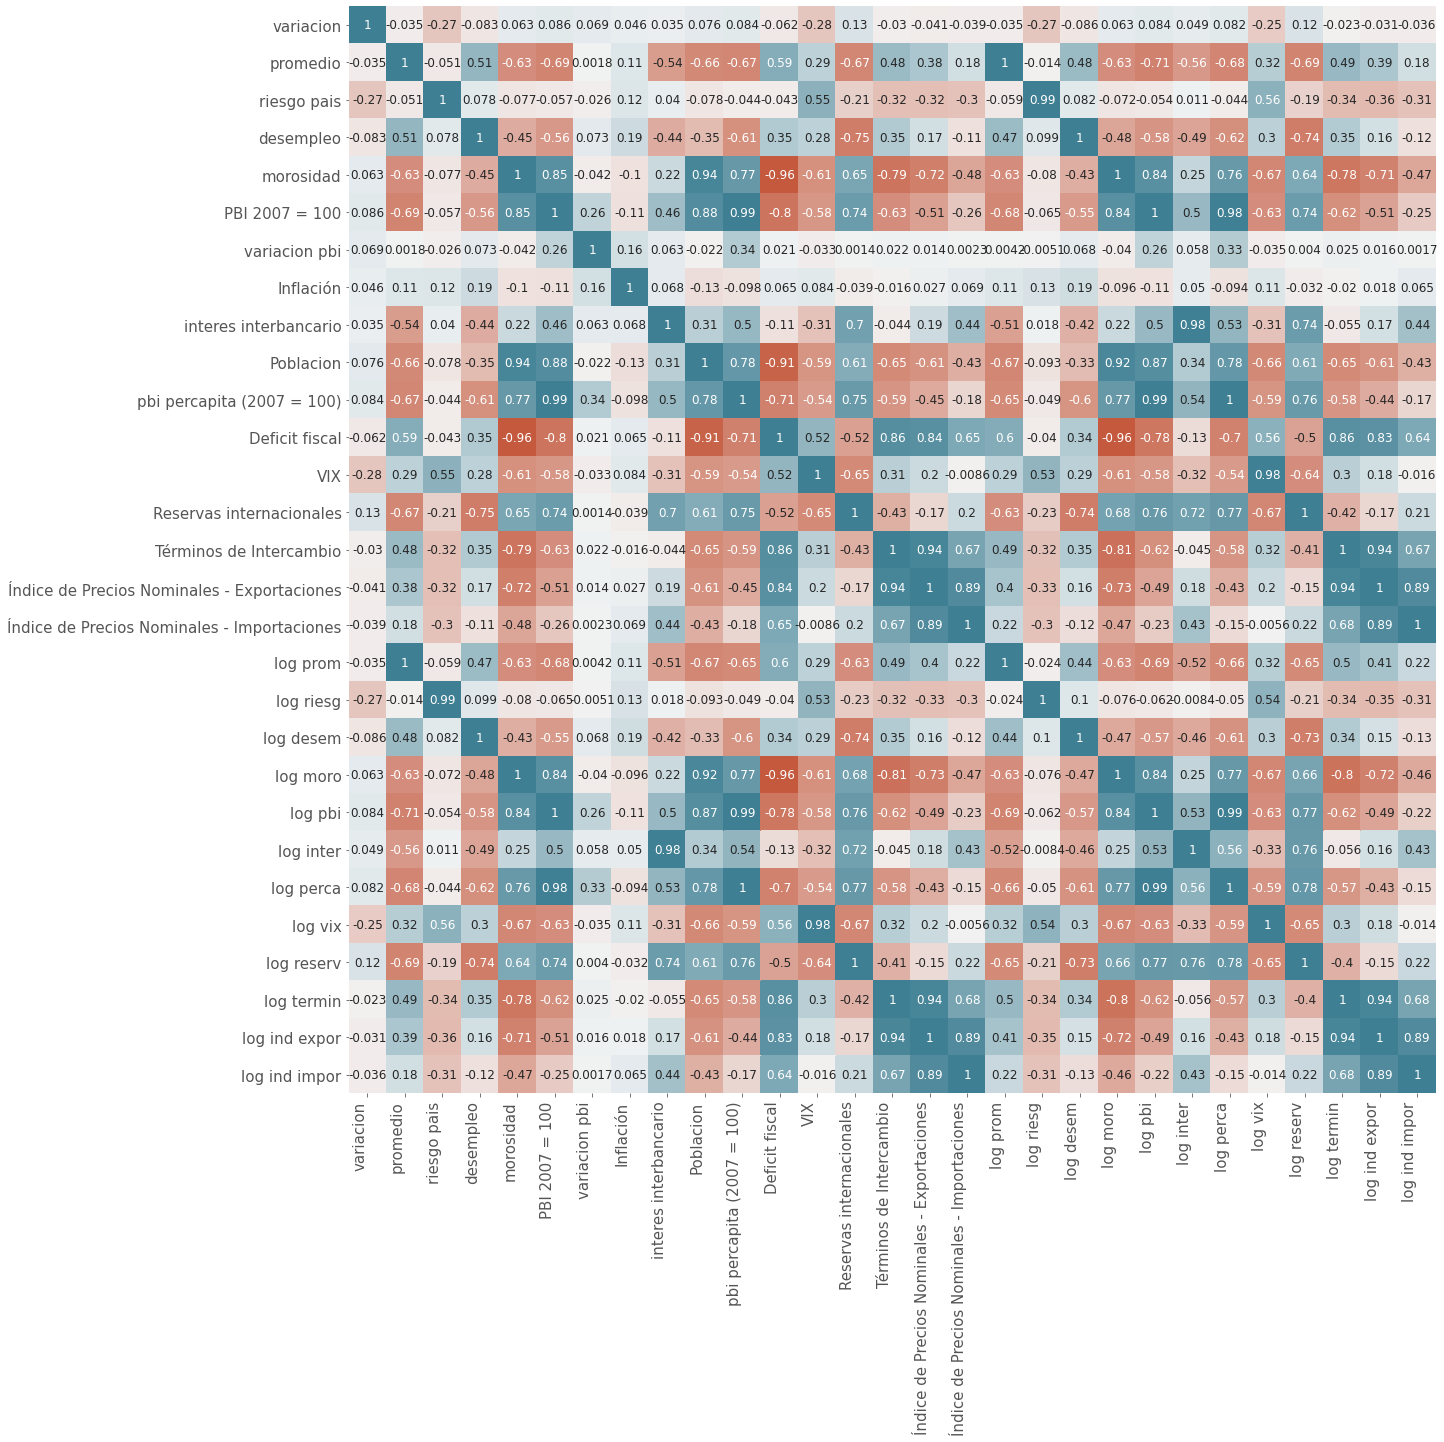

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[["log perca", "log pbi", "Inflación", "Deficit fiscal", "desempleo"]]
Y = datos['log riesg']

#

In [ ]:
X.shape[0] == Y.shape[0]

True

In [ ]:
X.shape

(97, 5)

In [ ]:
regresion_lineal = LinearRegression()

regresion_lineal.fit(X, Y)
prediccion = regresion_lineal.predict(X)

In [ ]:
X = datos[["log perca", "log pbi", "Inflación", "Deficit fiscal", "desempleo"]]
Y = datos['log riesg']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.621
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.165
Time:                        21:12:16   Log-Likelihood:                 86.394
No. Observations:                  77   AIC:                            -160.8
Df Residuals:                      71   BIC:                            -146.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0334      1.045      0.

In [ ]:
X = datos[["log perca", "log pbi", "Inflación", "Deficit fiscal", "desempleo", "log prom", "log moro", "log inter"]]
Y = datos['log riesg']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.046
Date:                Wed, 13 Jan 2021   Prob (F-statistic):            0.00548
Time:                        00:49:40   Log-Likelihood:                 94.024
No. Observations:                  77   AIC:                            -170.0
Df Residuals:                      68   BIC:                            -149.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2181      1.021      2.

In [ ]:
X = datos[["log perca", "log pbi", "Deficit fiscal", "log moro", "log inter"]]
Y = datos['log riesg']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4.665
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           0.000971
Time:                        00:50:31   Log-Likelihood:                 93.168
No. Observations:                  77   AIC:                            -174.3
Df Residuals:                      71   BIC:                            -160.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2509      0.915      2.

In [ ]:
X = datos[["log perca", "log pbi", "Inflación", "Deficit fiscal", "desempleo", "log prom", "log moro", "log inter", "VIX", "log vix", "Reservas internacionales",
           "Términos de Intercambio", "Índice de Precios Nominales - Exportaciones", "Índice de Precios Nominales - Importaciones"]]
Y = datos['riesgo pais']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     15.24
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.47e-15
Time:                        00:52:00   Log-Likelihood:                -323.51
No. Observations:                  77   AIC:                             677.0
Df Residuals:                      62   BIC:                             712.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
X = datos[["log perca", "log pbi", "Inflación", "Deficit fiscal", "desempleo", "log prom", "log moro", "log inter", "VIX", "log vix", "Reservas internacionales",
           "Términos de Intercambio", "Índice de Precios Nominales - Exportaciones", "Índice de Precios Nominales - Importaciones",
           "log reserv", "log termin", "log ind expor", "log ind impor"]]
Y = datos['log riesg']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     11.07
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.26e-12
Time:                        00:59:13   Log-Likelihood:                 137.39
No. Observations:                  77   AIC:                            -238.8
Df Residuals:                      59   BIC:                            -196.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
X = datos[["log prom", "log moro", "log inter", "VIX", "log vix", "Reservas internacionales",
           "Términos de Intercambio", "Índice de Precios Nominales - Exportaciones", "Índice de Precios Nominales - Importaciones",
           "log reserv", "log termin", "log ind expor", "log ind impor"]]
Y = datos['riesgo pais']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     17.56
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           6.87e-16
Time:                        00:58:10   Log-Likelihood:                -324.83
No. Observations:                  77   AIC:                             675.7
Df Residuals:                      64   BIC:                             706.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
X = datos[["log prom", "log moro", "log inter", "log vix", "log reserv", "log termin", "log ind expor", "log ind impor"]]
Y = datos['log riesg']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     24.08
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           3.10e-16
Time:                        01:35:40   Log-Likelihood:                 129.83
No. Observations:                  77   AIC:                            -243.7
Df Residuals:                      69   BIC:                            -224.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4587      0.435      5.649

In [ ]:
X = datos[[ "log inter", "log vix", "log reserv", "log ind expor", "log ind impor"]]
Y = datos['riesgo pais']
#X = X.reshape(X.shape[1:])
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     35.23
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           6.03e-18
Time:                        21:47:15   Log-Likelihood:                -332.90
No. Observations:                  77   AIC:                             677.8
Df Residuals:                      71   BIC:                             691.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           425.1739    350.665      1.212

El modelo no presenta Autocorrelación, pues el estadístico de Durbin-Watson es muy cercano a 2:
- [Durbin-Watson:  2.055]

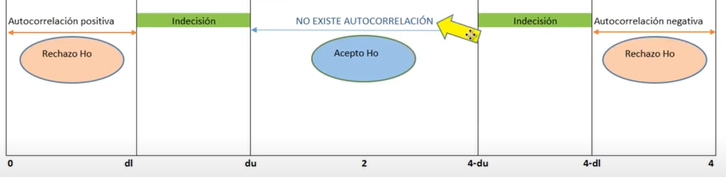

Jarque-Bera ¿Los residuos siguen una distribución normal?
ASIMETRÍA = 0
KURTOSIS = 3
- Skew:                           0.164
- Kurtosis:                       2.700

Jarque-Bera: 0.634
, indicando existencia de multicolinealidad





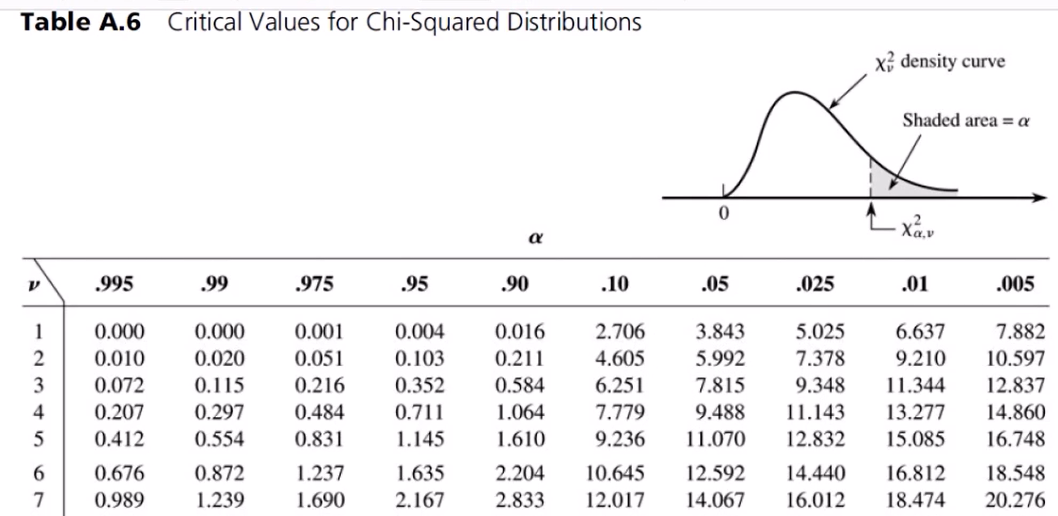

In [ ]:
#Test de white para heterocedasticidad
from statsmodels.stats.diagnostic import het_white
labels = ["LM-Statistics", "LM-Test P-value", "F-Statistic", "F-Test P-value"]
white_test = het_white(modelo.resid**2, X_train)
print(dict(zip(labels, white_test)))
#El Test de White tiene un p-valor muy bajo, por lo tanto presenta heterocedasticidad

{'LM-Statistics': 22.04319346468824, 'LM-Test P-value': 0.33817145523799186, 'F-Statistic': 1.1230809355974696, 'F-Test P-value': 0.35420141303573804}


SyntaxError: ignored